# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **July 16th, 2025**.

# Import Statements

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler


# Notebook Presentation

In [110]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [111]:
data = pd.read_csv('all_movies_budgets.csv')

# Explore and Clean the Data


1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [112]:
data.shape

(2000, 6)

In [113]:
data.head()

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,533200000,936662225,2056046835
1,2,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2717503922
2,3,"Dec 9, 2022",Avatar: The Way of Water,400000000,684075767,2320250281
3,4,"May 17, 2025",Mission: Impossible—The Final Reckoning,400000000,194238593,584338593
4,5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802


In [114]:
data.tail()

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
1995,"1,996","Dec 8, 2023",Poor Things,35000000,34553225,111894450
1996,"1,997","Dec 24, 2015",Concussion,35000000,34531832,50363790
1997,"1,998","Sep 29, 2017",The Foreigner,35000000,34393507,145374099
1998,"1,999","Dec 3, 2004",Closer,35000000,33987757,116148537
1999,"2,000","Dec 23, 1994",Street Fighter,35000000,33423000,99423000


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               2000 non-null   object
 1   Release Date       2000 non-null   object
 2   Movie              2000 non-null   object
 3   Production Budget  2000 non-null   int64 
 4   Domestic Gross     2000 non-null   int64 
 5   Worldwide Gross    2000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 93.9+ KB


In [116]:
data.sample()

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
1249,"1,250","Aug 18, 2016",Kubo and the Two Strings,55000000,48023088,77548122


In [117]:
data.isna().values.any()

np.False_

In [118]:
data.duplicated().values.any()

np.False_

In [119]:
duplicated_rows = data[data.duplicated()]
len(duplicated_rows) #duplicated rows

0

### Data Type Conversions

Convert the 'Rank' column to a numeric format by removing `,`.
<br>
<br>

In [120]:
chars_to_remove = [',']

# Replace each character with an empty string
data['Rank'] = data['Rank'].astype(str).str.replace(',', "")
    # Convert column to a numeric data type
data['Rank'] = pd.to_numeric(data['Rank'])

data.head()

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,533200000,936662225,2056046835
1,2,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2717503922
2,3,"Dec 9, 2022",Avatar: The Way of Water,400000000,684075767,2320250281
3,4,"May 17, 2025",Mission: Impossible—The Final Reckoning,400000000,194238593,584338593
4,5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802


Convert the `Release_Date` column to a Pandas Datetime type.
For the ones which are unknown, we are gonna set them as NaT and drop them after that because they aren't released yet.

In [121]:

data["Release Date"] = pd.to_datetime(data["Release Date"], format="%b %d, %Y", errors="coerce")



In [122]:
data_clean = data.dropna(subset=["Release Date"])
data_clean.head()
print(data_clean["Release Date"].isna().sum())

0


In [123]:
data_clean.isna().values.any()


np.False_

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rank               2000 non-null   int64         
 1   Release Date       1989 non-null   datetime64[ns]
 2   Movie              2000 non-null   object        
 3   Production Budget  2000 non-null   int64         
 4   Domestic Gross     2000 non-null   int64         
 5   Worldwide Gross    2000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 93.9+ KB


### Descriptive Statistics

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [125]:
data_clean.describe()

,Rank,Release Date,Production Budget,Domestic Gross,Worldwide Gross
count,"1,989.00",1989,"1,989.00","1,989.00","1,989.00"
mean,998.94,2009-07-05 01:24:42.352941056,"84,269,167.51","96,924,758.96","237,175,263.80"
min,1.00,1963-06-12 00:00:00,"35,000,000.00",0.00,0.00
25%,500.00,2002-09-20 00:00:00,"46,000,000.00","32,698,899.00","62,176,754.00"
50%,998.00,2009-10-23 00:00:00,"65,000,000.00","63,803,100.00","145,544,746.00"
75%,"1,499.00",2016-06-24 00:00:00,"100,000,000.00","124,987,022.00","299,477,886.00"
max,"2,000.00",2025-12-25 00:00:00,"533,200,000.00","936,662,225.00","2,923,706,026.00"
std,577.18,NaN,"53,877,563.24","105,817,592.80","286,670,250.27"


The average film costs about $84m to make and makes around 3x that in worldwide revenue. So that's encouraging.

The minimum domestic and worldwide revenue is $0. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

On the other hand, the highest production budget was $533,000,000 and the highest worldwide revenue was 2,923,706,026. 2.9 Billion revenue!



In [126]:
data_clean[data_clean['Production Budget'] == 35000000.00] #the films with the lowest budget in the dataset

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
1936,1937,2017-08-31,It,35000000,328828874,704128874
1937,1938,2009-06-05,The Hangover,35000000,277322503,465487583
1938,1939,2009-11-20,The Blind Side,35000000,255959475,305705794
1939,1940,1989-06-23,Batman,35000000,252651617,412811617
1940,1941,1999-06-10,Austin Powers: The Spy Who Shagged Me,35000000,206040085,312383487
...,...,...,...,...,...,...
1995,1996,2023-12-08,Poor Things,35000000,34553225,111894450
1996,1997,2015-12-24,Concussion,35000000,34531832,50363790
1997,1998,2017-09-29,The Foreigner,35000000,34393507,145374099
1998,1999,2004-12-03,Closer,35000000,33987757,116148537


In [127]:
data_clean.max() # film with the highest production budget

,0
Rank,2000
Release Date,2025-12-25 00:00:00
Movie,xXx: Return of Xander Cage
Production Budget,533200000
Domestic Gross,936662225
Worldwide Gross,2923706026


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [128]:
zero_domestic = data_clean[data_clean['Domestic Gross'] == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('Production Budget', ascending=False)


Number of films that grossed $0 domestically 54


,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
34,35,2025-12-17,Avatar: Fire and Ash,250000000,0,0
109,110,2020-07-23,Mulan,200000000,0,69973540
110,111,2021-07-02,The Tomorrow War,200000000,0,19220000
111,112,2022-07-13,The Gray Man,200000000,0,451178
214,215,2019-11-01,The Irishman,159000000,0,914706
276,277,2021-11-04,Red Notice,150000000,0,173638
277,278,2024-07-03,Beverly Hills Cop: Axel F,150000000,0,0
278,279,2019-12-13,6 Underground,150000000,0,0
306,307,2025-09-24,One Battle After Another,140000000,0,0
400,401,2018-11-09,Outlaw King,120000000,0,0


How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [129]:
zero_worldwide = data_clean[data_clean['Worldwide Gross'] == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('Production Budget', ascending=False)

Number of films that grossed $0 worldwide 28


,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
34,35,2025-12-17,Avatar: Fire and Ash,250000000,0,0
277,278,2024-07-03,Beverly Hills Cop: Axel F,150000000,0,0
278,279,2019-12-13,6 Underground,150000000,0,0
306,307,2025-09-24,One Battle After Another,140000000,0,0
400,401,2018-11-09,Outlaw King,120000000,0,0
401,402,2022-12-02,Emancipation,120000000,0,0
415,416,2019-03-06,Triple Frontier,115000000,0,0
540,541,2020-05-29,Artemis Fowl,100000000,0,0
541,542,2025-11-05,Predator: Badlands,100000000,0,0
631,632,2017-12-13,Bright,90000000,0,0


### Filtering on Multiple Conditions

In [130]:
international_releases = data_clean.loc[(data['Domestic Gross'] == 0) &
                                  (data_clean['Worldwide Gross']!= 0)] #films that made money internationally but had 0 box office revenuein US
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 26


,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
109,110,2020-07-23,Mulan,200000000,0,69973540
110,111,2021-07-02,The Tomorrow War,200000000,0,19220000
111,112,2022-07-13,The Gray Man,200000000,0,451178
214,215,2019-11-01,The Irishman,159000000,0,914706
276,277,2021-11-04,Red Notice,150000000,0,173638


Using the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing and creating a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

In [131]:
international_releases = data_clean.query('`Domestic Gross` == 0 and `Worldwide Gross` != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 26


,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
1836,1837,2018-11-09,Kursk,40000000,0,5578259
1837,1838,2016-09-23,USS Indianapolis: Men of Courage,40000000,0,1663785
1838,1839,2015-04-10,Dragon Nest Warriors' Dawn,40000000,0,734423
1891,1892,2008-08-26,Virgin Territory,38000000,0,5473041
1934,1935,2015-09-03,Queen of the Desert,36000000,0,1578543


### Unreleased Films
* Identifying which films were not released yet as of the time of data collection (July 16th, 2025).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_cl that does not include these films.

In [132]:
# Date of Data Collection
scrape_date = pd.Timestamp('2025-07-16')

In [133]:
future_releases = data_clean[data_clean['Release Date'] >= scrape_date]
future_releases

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
34,35,2025-12-17,Avatar: Fire and Ash,250000000,0,0
306,307,2025-09-24,One Battle After Another,140000000,0,0
541,542,2025-11-05,Predator: Badlands,100000000,0,0
944,945,2025-12-25,Marty Supreme,70000000,0,0
959,960,2025-10-22,Mortal Kombat 2,68000000,0,0
1892,1893,2025-08-06,Weapons,38000000,0,0


In [134]:
data_cl = data_clean.drop(future_releases.index) #droping the films that were not released yet

### Films that Lost Money

What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [135]:
money_losing = data_cl.loc[data_cl['Production Budget']> data_cl['Worldwide Gross']]
len(money_losing)/len(data_cl)

0.23852748361069087

# Seaborn for Data Viz: Bubble Charts

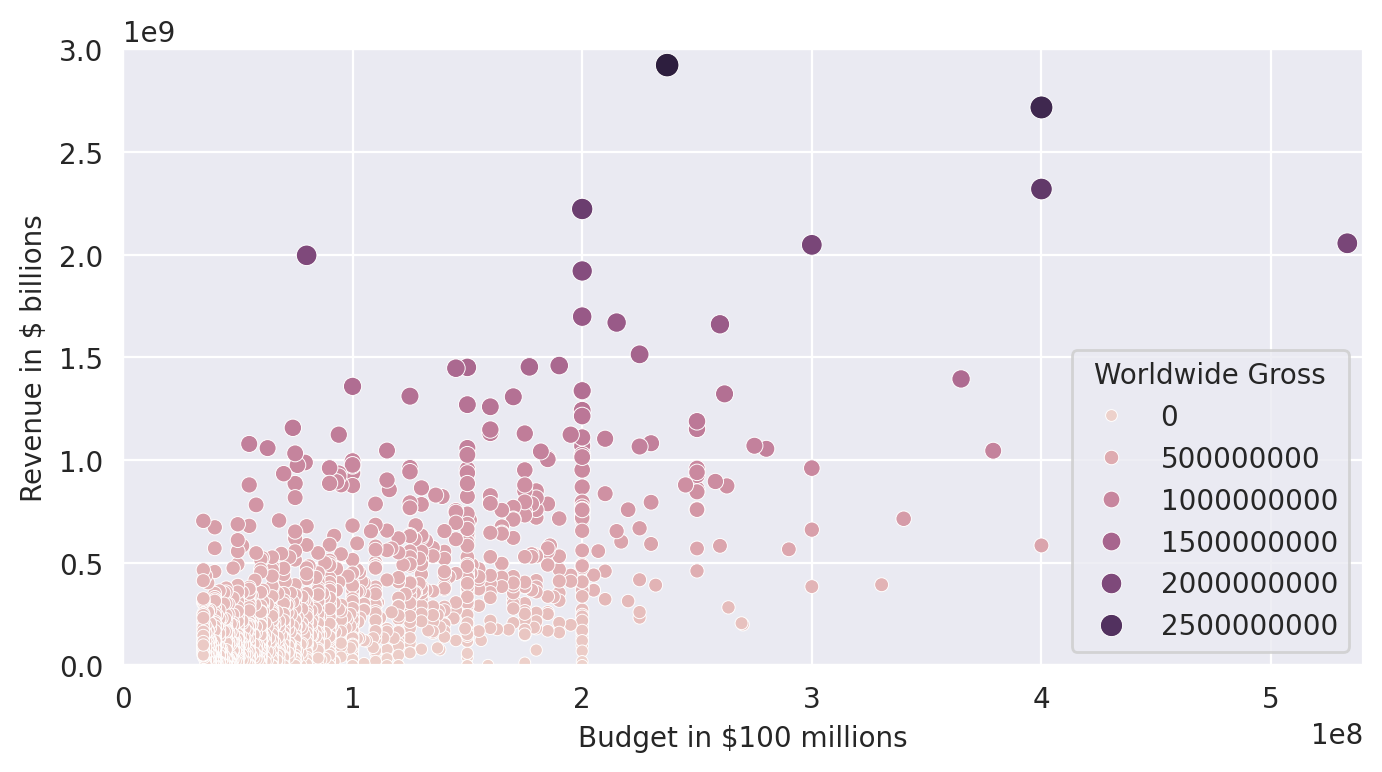

In [136]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_cl,
                  x='Production Budget',
                  y='Worldwide Gross',
                  hue='Worldwide Gross', # colour
                  size='Worldwide Gross',) # dot size


  ax.set(ylim=(0, 3000000000),
        xlim=(0, 540000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')
plt.show()

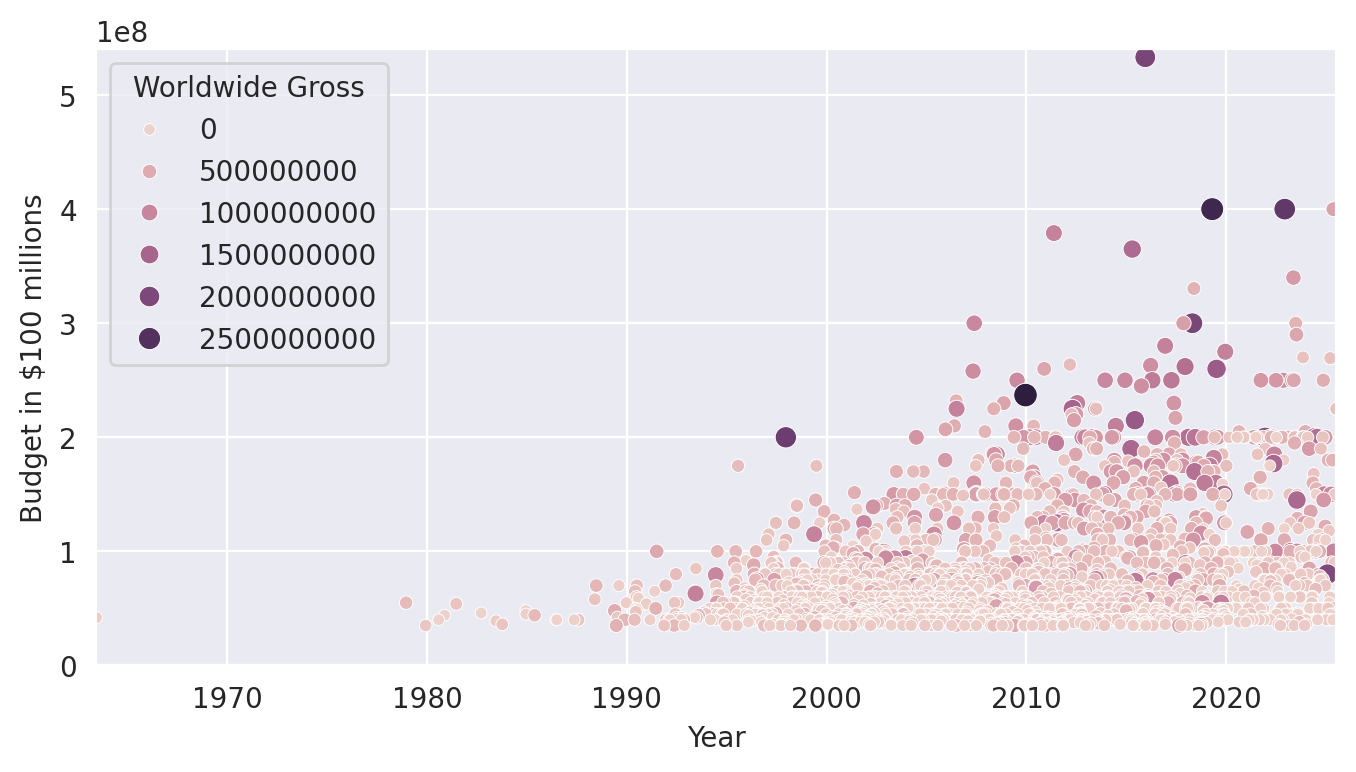

In [137]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_cl,
                    x='Release Date',
                    y='Production Budget',
                    hue='Worldwide Gross',
                    size='Worldwide Gross',)

    ax.set(ylim=(0, 540000000),
           xlim=(data_cl['Release Date'].min(), data_cl['Release Date'].max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

**Analysis**

What do we see here? What is this chart telling us? Well, first off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

 Converting Years to Decades

Creating a column in `data_cl` that has the decade of the release.


In [138]:
dt_index = pd.DatetimeIndex(data_cl['Release Date'])
years = dt_index.year

In [173]:
decades = years//10*10
data_cl['Decade'] = decades
data_cl['Year'] = years

### Separate the "old" (before 1970) and "New" (1980s onwards) Films
Create two new DataFrames: `old_films` and `new_films`
* `old_films` will include all the films before 1979 (up to and including 1979)
* `new_films` will include all the films from 1980 onwards
* How many films were released prior to 1980?
* What was the most expensive film made prior to 1980?

In [140]:
old_films = data_cl[data_cl.Decade <= 1980]
new_films = data_cl[data_cl.Decade > 1980]

In [141]:
old_films.shape[0]

24

In [142]:
old_films.describe()

,Rank,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Decade
count,24.00,24,24.00,24.00,24.00,24.00
mean,"1,558.46",1984-09-17 19:00:00,"46,083,333.33","73,429,385.29","150,222,897.54","1,978.33"
min,882.00,1963-06-12 00:00:00,"35,000,000.00","1,641,825.00","3,484,523.00","1,960.00"
25%,"1,419.50",1982-05-26 06:00:00,"40,000,000.00","27,453,186.00","27,496,085.25","1,980.00"
50%,"1,615.00",1985-12-04 00:00:00,"43,000,000.00","55,131,614.50","109,600,000.00","1,980.00"
75%,"1,803.75",1988-09-14 00:00:00,"49,500,000.00","110,751,780.00","218,449,997.00","1,980.00"
max,"1,951.00",1989-12-22 00:00:00,"70,000,000.00","252,651,617.00","474,171,806.00","1,980.00"
std,303.30,NaN,"9,730,796.77","65,300,246.38","142,685,790.60",4.82


In [143]:
old_films[old_films['Production Budget'] == 70000000.00] # the most expensive films were Who Framed Roger Rabbit and The Abyss

,Rank,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Decade
881,882,1988-06-22,Who Framed Roger Rabbit?,70000000,154112492,351500000,1980
913,914,1989-08-09,The Abyss,70000000,54763229,54793997,1980


# Seaborn Regression Plots

<Axes: xlabel='Production Budget', ylabel='Worldwide Gross'>

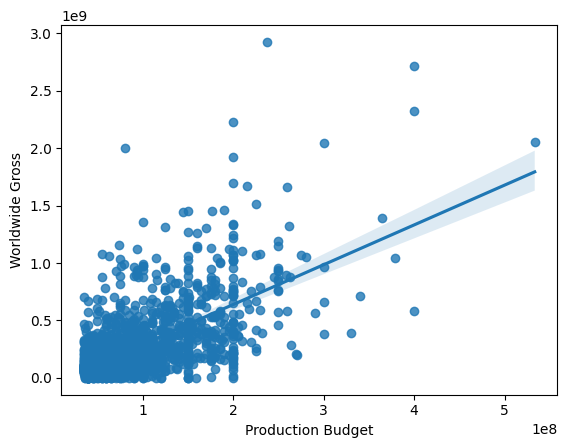

In [144]:
sns.regplot(data=new_films,
            x='Production Budget',
            y='Worldwide Gross')

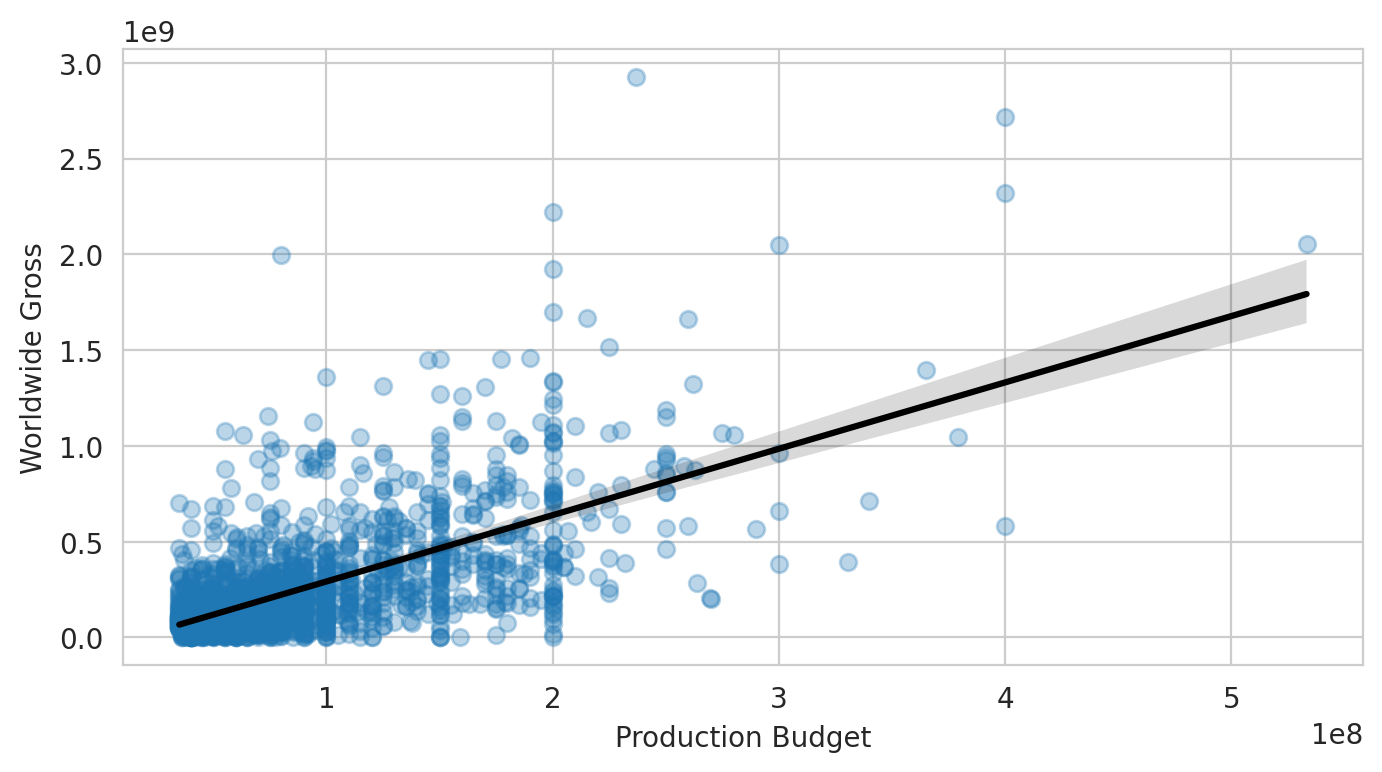

In [145]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=new_films,
            x='Production Budget',
            y='Worldwide Gross',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': 'black'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 540000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

# Run Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [187]:
# Explanatory Variable(s) or Feature(s)
X_train = pd.DataFrame(data_cl, columns=['Production Budget'])

# Response Variable or Target
y_train = pd.DataFrame(data_cl, columns=['Worldwide Gross'])

### **Scale/normalize the training data¶**

In [188]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:Production Budget    498200000
dtype: int64
Peak to Peak range by column in Normalized X:[9.26213272]


### **Create and fit the regression model¶**

In [189]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_norm, y_train.values.ravel())
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 13, number of weight updates: 25780.0


In [190]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [1.90829281e+08], b:[2.40195792e+08]


In [191]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[1.83317446e+09 1.36061494e+09 1.36061494e+09 1.36061494e+09]
Target values 
   Worldwide Gross
0       2056046835
1       2717503922
2       2320250281
3        584338593


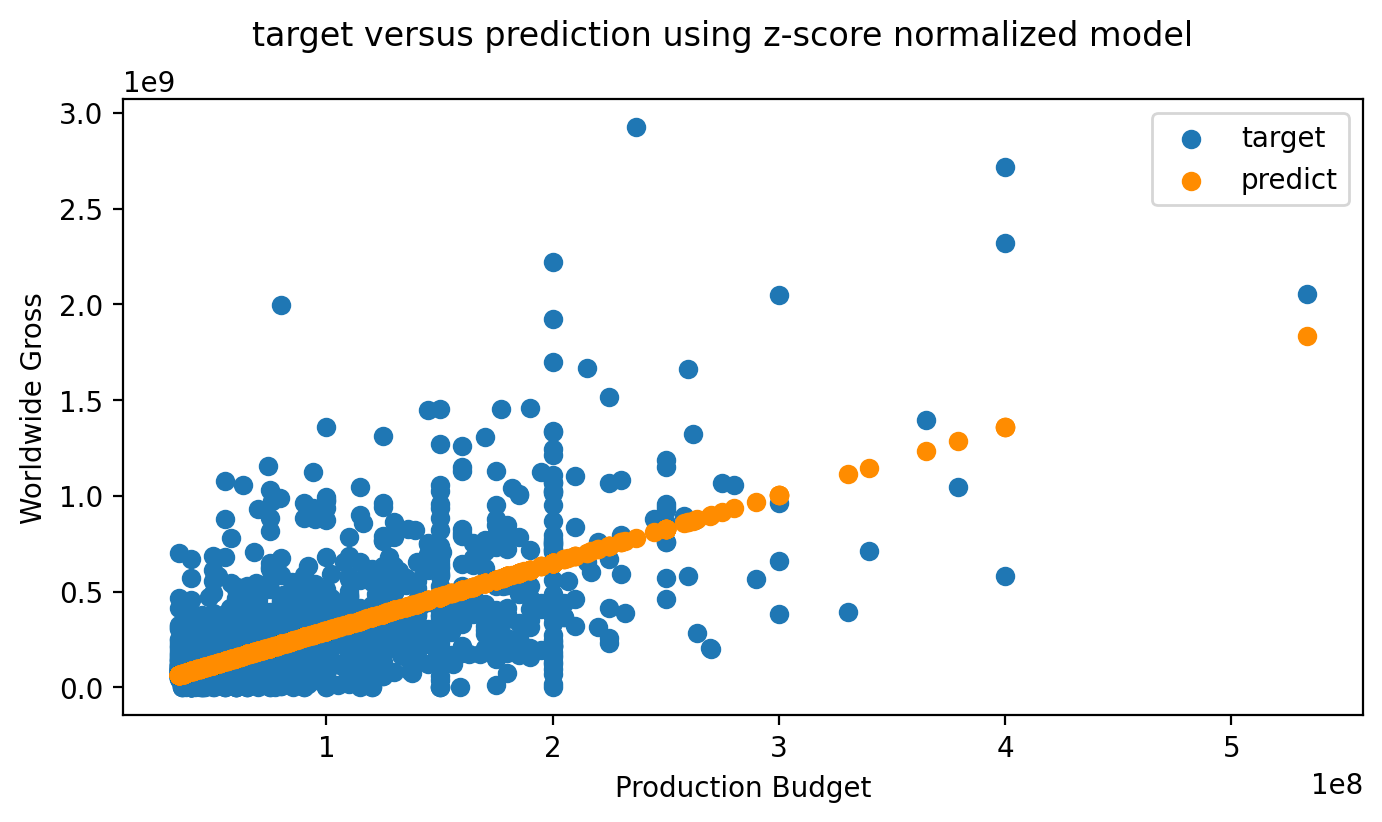

In [193]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

ax.scatter(X_train[:],y_train, label = 'target')
ax.set_xlabel('Production Budget')
ax.scatter(X_train[:],y_pred,color="darkorange", label = 'predict')
ax.set_ylabel("Worldwide Gross"); ax.legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()